In [29]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [30]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [31]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

Text(0, 0.5, 'Petal Width')

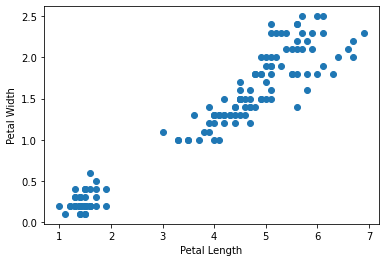

In [34]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

## 1) Using k-means clustering and creating a scatter plot to showcase the result. 

In [38]:
km = KMeans(n_clusters=3)
y_prediction = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
df['cluster'] = y_prediction
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [40]:
# Creating 3 sub dataframes so we can build the scatter plot.
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

In [44]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

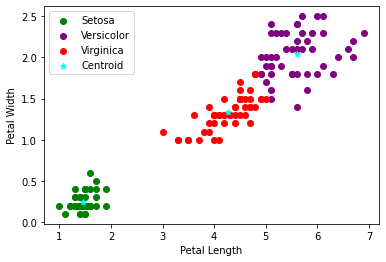

In [47]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', label='Setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='purple', label = 'Versicolor')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', label='Virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='Centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# 2) No need to use MinMaxScaler or any other methods from the looks of it, yet if we did it woud go like this:

In [50]:
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


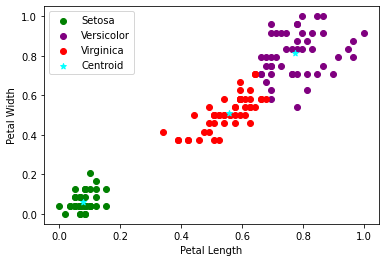

In [52]:
km = KMeans(n_clusters=3)
y_prediction = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_prediction

# Creating 3 sub dataframes so we can build the scatter plot.
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', label='Setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='purple', label = 'Versicolor')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', label='Virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='Centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

## 3) Elbow Plot

In [53]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


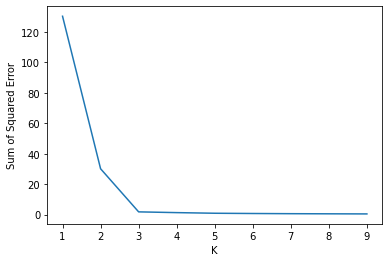

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)